In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("VNL2023.csv")

In [3]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    131 non-null    object 
 1   Country   131 non-null    object 
 2   Age       131 non-null    int64  
 3   Attack    131 non-null    float64
 4   Block     131 non-null    float64
 5   Serve     131 non-null    float64
 6   Set       131 non-null    float64
 7   Dig       131 non-null    float64
 8   Receive   131 non-null    float64
 9   Position  131 non-null    object 
dtypes: float64(6), int64(1), object(3)
memory usage: 10.4+ KB


In [5]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [7]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [9]:
numeric_cols=df.select_dtypes(include=["int","float"]).columns
corr_matrix=df[numeric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

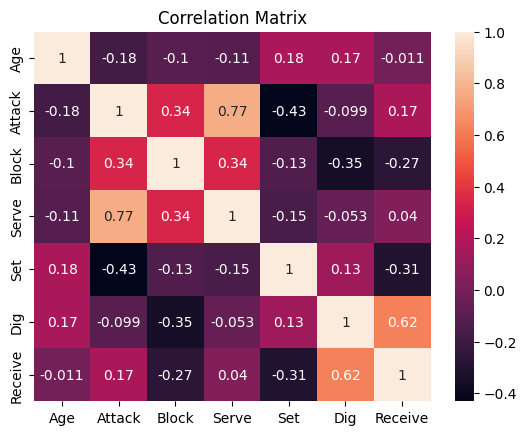

In [10]:
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")


In [15]:

position_counts=df["Position"].value_counts()
position_counts

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Positions')

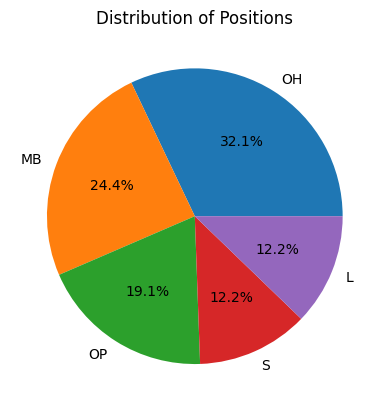

In [19]:
plt.pie(position_counts,labels=position_counts.index,autopct='%1.1f%%')
plt.title("Distribution of Positions")

In [23]:
avg_attack_by_country=df.groupby("Country")["Attack"].mean()
avg_attack_by_country.sort_values(ascending=False)


Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

<Axes: xlabel='Country'>

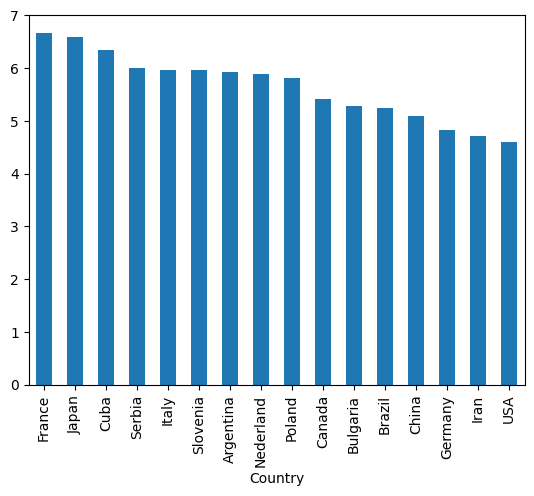

In [ ]:
avg_attack_by_country.sort_values(ascending=False).plot(kind="bar")
plt.title("Average Attack by Countries")

In [30]:
avg_serve_by_age=df.groupby("Age")['Serve'].mean()
avg_serve_by_age.sort_values(ascending=False)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

In [37]:
df.groupby(["Country","Position"])["Attack"].max().head(20)

Country    Position
Argentina  L            0.00
           MB           7.92
           OH          11.62
           OP           9.15
           S            0.78
Brazil     L            0.00
           MB           4.31
           OH          11.85
           OP          12.46
           S            0.38
Bulgaria   L            0.00
           MB           4.42
           OH          14.25
           OP           5.75
           S            0.17
Canada     L            0.00
           MB           4.75
           OH           9.75
           OP           9.50
           S            0.17
Name: Attack, dtype: float64

Text(0, 0.5, 'Frequency')

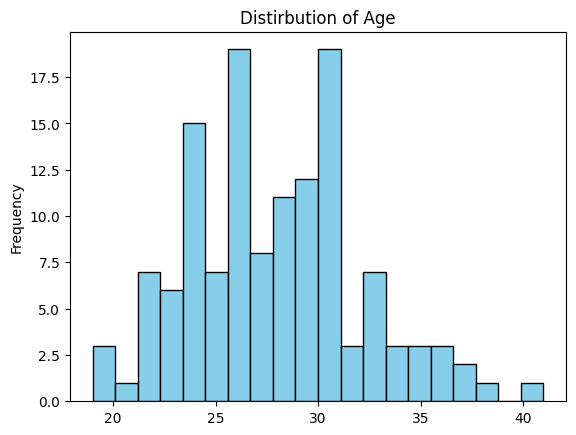

In [43]:
plt.hist(df["Age"], bins=20, color='skyblue', edgecolor="black")
plt.title("Distirbution of Age")
plt.ylabel("Frequency")

Text(0, 0.5, 'Averge attack')

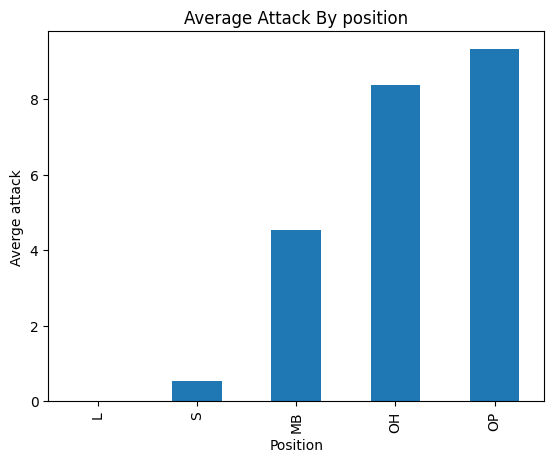

In [48]:
avg_attack_by_position=df.groupby("Position")["Attack"].mean()
avg_attack_by_position.sort_values(ascending=True).plot(kind="bar")
plt.title("Average Attack By position")
plt.ylabel("Averge attack")